In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [103]:
data = pd.read_csv('info_dec_1.csv')

In [114]:
data['phi_rad'] = data['phi_info']* np.pi/180
data['argument_rad'] = data['phi_rad']* 3/(2*np.pi)
data['alpha'] = np.arctan(data['argument_rad'])*180/ np.pi
data

,pkt,Channel,ant_info,phi_info,mag_info,theta_info,time_stamp,phi_rad,argument_rad,alpha
0,0,11,(-79+21j),-75.113733,81.743501,-0.625960,10.00,-1.310982,-0.625948,-32.044416
1,0,11,(-63+51j),-51.009006,81.055537,-0.425079,10.25,-0.890275,-0.425075,-23.029134
2,0,11,(-42+68j),-31.701430,79.924965,-0.264180,10.50,-0.553294,-0.264179,-14.798242
3,0,11,(-15+77j),-11.023456,78.447435,-0.091862,10.75,-0.192396,-0.091862,-5.248582
4,0,11,(88-16j),100.304846,89.442719,0.835903,12.00,1.750650,0.835874,39.891364
...,...,...,...,...,...,...,...,...,...,...
9631,32,18,(-33-518j),-176.354809,519.050094,-1.469785,5144.75,-3.077972,-1.469623,-55.766811
9632,32,18,(-474+232j),-63.920495,527.730992,-0.532678,5146.00,-1.115623,-0.532671,-28.042924
9633,32,18,(-357+387j),-42.690937,526.514957,-0.355760,5146.25,-0.745097,-0.355758,-19.583413
9634,32,18,(-164+499j),-18.193487,525.258984,-0.151613,5146.50,-0.317536,-0.151612,-8.621095


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002224FC15E48>],
      dtype=object)

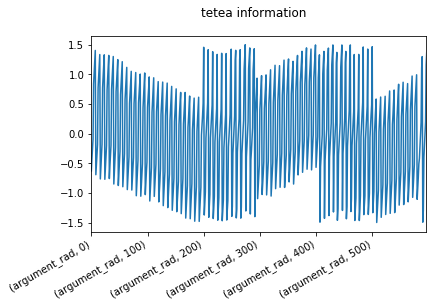

In [113]:
data.unstack(level=0)[['argument_rad']].plot(subplots=True, title="tetea information", xlim=[0,596])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002224FB89588>],
      dtype=object)

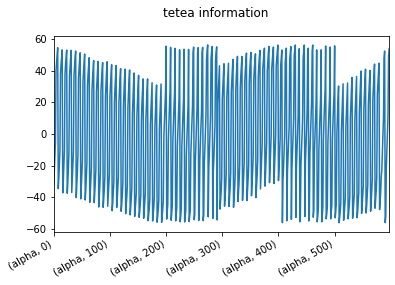

In [115]:
data.unstack(level=0)[['alpha']].plot(subplots=True, title="tetea information", xlim=[0,596])

# sampling time per channel ~ 160us
Here I manually am changing the sampling time per channel. Because it will create extra turns along the 360 degrees if we multiply the actuall data. 
As a result, I only multiply once the time is between 10us to 160us 
### Timing per pkt
- 4us : guard (no sampling here)
- 8us : the reference with 32 samples (sampling starts here)
- 157us: sampling happens here, also the switching time is here. each 1us has 4 sampls. as a result we have 292 sampls finally. in each pkt with 4 antenna, only 288 of this data is a complete period of ant_array. 

 # w is in radian --> omegat in angle = omegat(rad)* (180/pi)

# Calculating the phase with respect to the time
For each channel, the wt (omega.t) is calculated separatly. This value is in radian. So, we concert it to degrees by: * 180/pi
As a result, the answer will be between -180 to 180 degrees. 
Yet, if:
real_phi = phi_info - wt_per_channel 
no furthur calculations is needed. 
- Now the angle will be between -360 to +360 degrees! 
why? because:
    -180< phi_info<+180
    -180 < -wt_per_channel< +180
therefore --> -180< phi_info<+180 + -180 < -wt_per_channel< +180 --> -360 < real_phi < +360

# Converting the angle to the [-180, 180] range:

# Plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022250E2D8C8>],
      dtype=object)

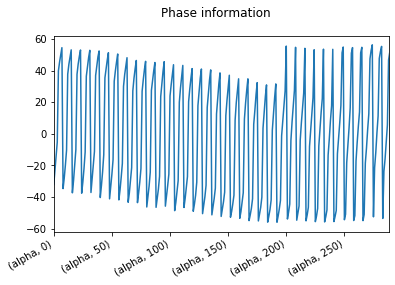

In [117]:
data.unstack(level=0)[['alpha']].plot(subplots=True, title="Phase information", xlim=[0,288])

In [310]:
# data.to_csv('time_added_data_1.csv', index = False)

## Separating each antenna per channel

In [118]:
data_size = len(data)
N = int(data_size/288)
info_per_ant = []
for n in range(N):
    for k in range(0 + n*288, 288*(n+1), 4):
        info_per_ant.append({"pkt": data['pkt'][k], 
                             "channel": data['Channel'][k], 
                             "phi_ant1": data['alpha'][k + 3],
                             "phi_ant2": data['alpha'][k], 
                             "phi_ant3": data['alpha'][k + 1], 
                             "phi_ant4": data['alpha'][k + 2]})
result = pd.DataFrame(info_per_ant)

In [119]:
result = result.dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022250D423C8>],
      dtype=object)

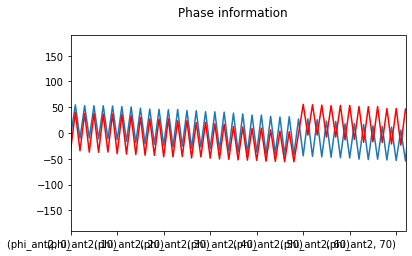

In [120]:
result.unstack(level=0)[['phi_ant1']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190])
result.unstack(level=0)[['phi_ant2']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'red')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022250DA7348>],
      dtype=object)

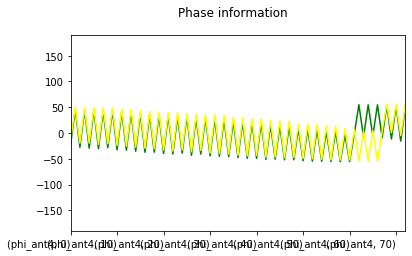

In [121]:
result.unstack(level=0)[['phi_ant3']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'green')
result.unstack(level=0)[['phi_ant4']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'yellow')

In [122]:
phi_3 = result['phi_ant3'][0:72]
phi_2 = result['phi_ant2'][0:72] 
phi_1 = result['phi_ant1'][0:72]
phi_4 = result['phi_ant4'][0:72] 
print(np.average(phi_1), np.average(phi_2), np.average(phi_3), np.average(phi_4))

1.1358604997720458 -2.5531355029302683 -4.994444486331336 -2.7262877211499474


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022250C6BAC8>],
      dtype=object)

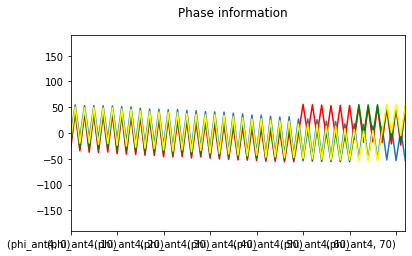

In [123]:
result.unstack(level=0)[['phi_ant1']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190])
result.unstack(level=0)[['phi_ant2']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'red')
result.unstack(level=0)[['phi_ant3']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'green')
result.unstack(level=0)[['phi_ant4']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'yellow')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022250CFBF08>],
      dtype=object)

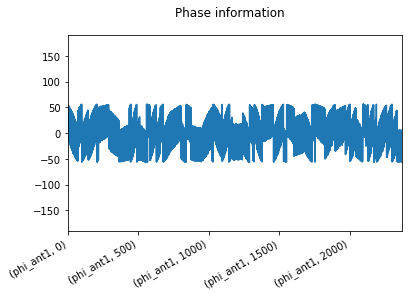

In [126]:
result.unstack(level=0)[['phi_ant1']].plot(subplots=True, title="Phase information", ylim=[-190,+190])
# result.unstack(level=0)[['phi_ant2']].plot(subplots=True, title="Phase information", ylim=[-190,+190], color = 'red')
# result.unstack(level=0)[['phi_ant3']].plot(subplots=True, title="Phase information", ylim=[-190,+190], color = 'green')
# result.unstack(level=0)[['phi_ant4']].plot(subplots=True, title="Phase information", ylim=[-190,+190], color = 'yellow')

In [125]:
print(np.average(result['phi_ant1']),np.average(result['phi_ant2']), np.average(result['phi_ant3']), np.average(result['phi_ant4']))

-0.37921551018166283 1.6312722490851885 2.8233380003663306 1.7136047749340553
